<a href="https://colab.research.google.com/github/KathyRoma/DS-Unit-1-Sprint-1-Data-Wrangling-and-Storytelling/blob/master/LS_DS16_111_Exploratory_Data_Analysis_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Practice Loading and Exploring Datasets

This assignment is purposely open-ended. You will be asked to load datasets from the [UC-Irvine Machine Learning Repository](https://archive.ics.uci.edu/ml/index.php). 

Even though you maybe using different datasets than your fellow classmates, try and be supportive and assist each other in the challenges that you are facing. You will only deepend your understanding of these topics as you work to assist one another. Many popular UCI datasets face similar data loading challenges.

Remember that the UCI datasets do not necessarily have a file type of `.csv` so it's important that you learn as much as you can about the dataset before you try and load it. See if you can look at the raw text of the file either locally or using the `!curl` shell command -or in some other way before you try and read it in as a dataframe. This will help you catch what would otherwise be unforseen problems.

Feel free to embellish this notebook with additional markdown cells,code cells, comments, graphs, etc. Whatever you think helps adequately address the questions.

## 1) Load a dataset from UCI (via its URL)

Please navigate to the home page and choose a dataset (other than the Adult dataset) from the "Most Popular" section on the right-hand side of the home page. Load the dataset via its URL and check the following (show your work):

- Are the headers showing up properly?
- Look at the first 5 and the last 5 rows, do they seem to be in order?
- Does the dataset have the correct number of rows and columns as described in the UCI page? 
 - Remember, that UCI does not count the y variable (column of values that we might want to predict via a machine learning model) as an "attribute" but rather as a "class attribute" so you may end up seeing a number of columns that is one greater than the number listed on the UCI website.
- Does UCI list this dataset as having missing values? Check for missing values and see if your analysis corroborates what UCI reports?
- if `NaN` values or other missing value indicators are not being detected by `df.isnull().sum()` find a way to replace whatever is indicating the missing values with `np.NaN`.
- Use the .describe() function in order to see the summary statistics of both the numeric and non-numeric columns. 

In [0]:
# TODO your work here!
# And note you should write comments, descriptions, and add new
# code and text blocks as needed

In [21]:
# Import pandas
import pandas as pd

# Assign dataset URL as a new variable for further convenience
cars_url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/car/car.data'

# Use read_csv() to read the file
pd.read_csv(cars_url)

,vhigh,vhigh.1,2,2.1,small,low,unacc
0,vhigh,vhigh,2,2,small,med,unacc
1,vhigh,vhigh,2,2,small,high,unacc
2,vhigh,vhigh,2,2,med,low,unacc
3,vhigh,vhigh,2,2,med,med,unacc
4,vhigh,vhigh,2,2,med,high,unacc
...,...,...,...,...,...,...,...
1722,low,low,5more,more,med,med,good
1723,low,low,5more,more,med,high,vgood
1724,low,low,5more,more,big,low,unacc
1725,low,low,5more,more,big,med,good


In [27]:
# Fix the column names using information from UCIML Rep
column_headers = ['buying', 'maintain', 'doors', 'persons', 'luggage_boot', 'safety', 'acceptability']
cars = pd.read_csv(cars_url, names=column_headers)
cars

,buying,maintain,doors,persons,luggage_boot,safety,acceptability
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc
...,...,...,...,...,...,...,...
1723,low,low,5more,more,med,med,good
1724,low,low,5more,more,med,high,vgood
1725,low,low,5more,more,big,low,unacc
1726,low,low,5more,more,big,med,good


In [36]:
# Just to check if the information about rows and columns is correct
print(cars.shape)
cars.head(8)

(1728, 7)


,buying,maintain,doors,persons,luggage_boot,safety,acceptability
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc
5,vhigh,vhigh,2,2,med,high,unacc
6,vhigh,vhigh,2,2,big,low,unacc
7,vhigh,vhigh,2,2,big,med,unacc


In [44]:
cars.describe()
# Some stats about this dataset

,buying,maintain,doors,persons,luggage_boot,safety,acceptability
count,1728,1728,1728,1728,1728,1728,1728
unique,4,4,4,3,3,3,4
top,low,low,2,2,med,low,unacc
freq,432,432,432,576,576,576,1210


In [46]:
# Check for missing values
cars.isnull().sum()



buying           0
maintain         0
doors            0
persons          0
luggage_boot     0
safety           0
acceptability    0
dtype: int64

In [50]:
cars.dtypes
# That's interesting -- no numeric values (integers or floats). 
# What about doors and persons? Aren't those integers? 


buying           object
maintain         object
doors            object
persons          object
luggage_boot     object
safety           object
acceptability    object
dtype: object

In [51]:
## Let's look at the last rows. 
## Now we see, that the number of doors and the number of people are not defined by numbers
cars.tail(5)

,buying,maintain,doors,persons,luggage_boot,safety,acceptability
1723,low,low,5more,more,med,med,good
1724,low,low,5more,more,med,high,vgood
1725,low,low,5more,more,big,low,unacc
1726,low,low,5more,more,big,med,good
1727,low,low,5more,more,big,high,vgood


In [52]:
# This looks beautiful: equal number of two-doors coupes, sedans and 5-door hatchbacks 
cars['persons'].value_counts()

2       576
4       576
more    576
Name: persons, dtype: int64

In [53]:
#Just checking if it makes sense
576*3

1728

## 2) Load a dataset from your local machine.
Choose a second dataset from the "Popular Datasets" listing on UCI, but this time download it to your local machine instead of reading it in via the URL. Upload the file to Google Colab using the files tab in the left-hand sidebar or by importing `files` from `google.colab` The following link will be a useful resource if you can't remember the syntax: <https://towardsdatascience.com/3-ways-to-load-csv-files-into-colab-7c14fcbdcb92>

- Answer all of the same bullet point questions from part 1 again on this new dataset. 


In [5]:
# I downloaded another dataset from UCIML Rep to my computer
# and used imported files to upload it to my colab notebook

from google.colab import files
uploaded = files.upload()

Saving wine.data to wine.data


In [26]:
# I read the file
import io
wine = pd.read_csv(io.BytesIO(uploaded['wine.data']))
wine

,1,14.23,1.71,2.43,15.6,127,2.8,3.06,.28,2.29,5.64,1.04,3.92,1065
0,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
1,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
2,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
3,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
4,1,14.20,1.76,2.45,15.2,112,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
172,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
173,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
174,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
175,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [31]:
# -- and again I need to add column names using dataset description from the source
column_headers = ['alcohol','malic acid', 'ash', 
                  'alcalinity', 'magnesium', 'total_ph','flavonids', 
                  'nonfl_ph', 'proanthocyanins', 'color_int', 
                  'hue', 'OD', 'proline']
                  # I used capital letters to name OD column because it's an industry term
                  
wines = pd.read_csv(io.BytesIO(uploaded['wine.data']), names=column_headers)
wines

,alcohol,malic acid,ash,alcalinity,magnesium,total_ph,flavonids,nonfl_ph,proanthocyanins,color_int,hue,OD,proline
1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [37]:
# let's look at some analytics 
wines.describe()
# I don't drink so I have no idea what we have here. Probably some good wines. 
# I can say how strong the wines are, and that's it
## One thing I noticed that count equals to the number of rows -- It might mean that there is no missing data. 


,alcohol,malic acid,ash,alcalinity,magnesium,total_ph,flavonids,nonfl_ph,proanthocyanins,color_int,hue,OD,proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


In [39]:
# Let's check it
wines.isnull().sum()
## No missing data, both according to dataset description from the source and my exploration

alcohol            0
malic acid         0
ash                0
alcalinity         0
magnesium          0
total_ph           0
flavonids          0
nonfl_ph           0
proanthocyanins    0
color_int          0
hue                0
OD                 0
proline            0
dtype: int64

In [41]:
wines.dtypes


alcohol            float64
malic acid         float64
ash                float64
alcalinity         float64
magnesium            int64
total_ph           float64
flavonids          float64
nonfl_ph           float64
proanthocyanins    float64
color_int          float64
hue                float64
OD                 float64
proline              int64
dtype: object

In [0]:
# Seems like we have no categorical values, only numerical variables.
wines.describe(exclude='number')
## It returns an error No objects to concatenate

## 3) Make Crosstabs of the Categorical Variables

Take whichever of the above datasets has more categorical variables and use crosstabs to tabulate the different instances of the categorical variables.


In [76]:
# Your Code Here
pd.crosstab(cars['doors'], cars['safety'])
# Again, this is a very symmetrical database

safety,high,low,med
doors,,,
2,144,144,144
3,144,144,144
4,144,144,144
5more,144,144,144


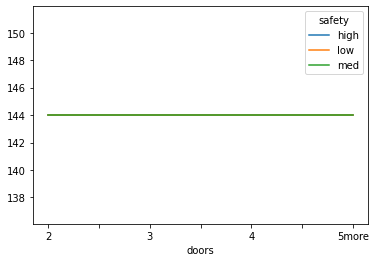

In [80]:
pd.crosstab(cars['doors'], cars['safety']).plot();
# Not very useful, and yet


## 4) Explore the distributions of the variables of the dataset using:
- Histograms
- Scatterplots
- Density Plots

In [59]:
# Wow. This dataset is totally symmetrical. 
cars['buying'].value_counts().sort_index()


high     432
low      432
med      432
vhigh    432
Name: buying, dtype: int64

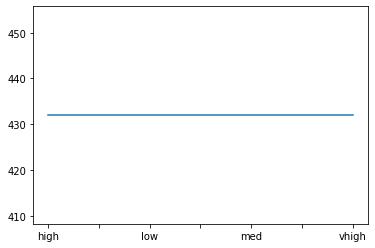

In [62]:
cars['buying'].value_counts().sort_index().plot()

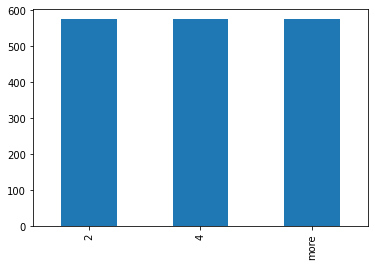

In [82]:
# Every column is plotted as a horizontal line or identical bars
cars['persons'].value_counts().sort_index().plot(kind='bar')

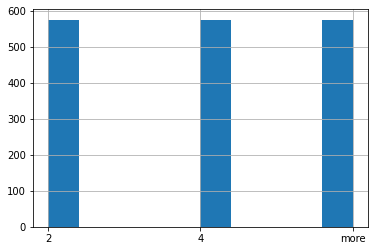

In [70]:
cars['persons'].hist()

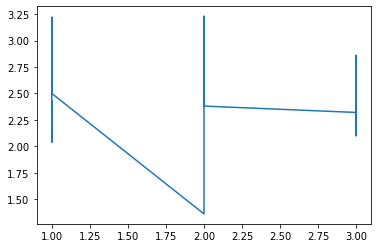

In [66]:
#How about our wines
wines['ash'].plot();
## This looks weird. I'll try another column with value_count

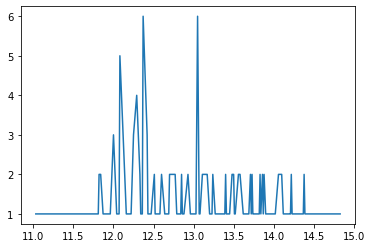

In [69]:
wines['alcohol'].value_counts().sort_index().plot();

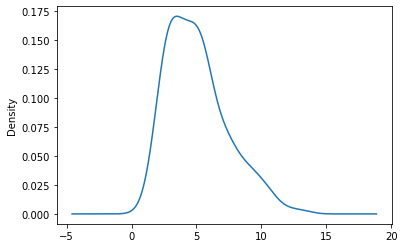

In [73]:
wines['color_int'].plot.density();

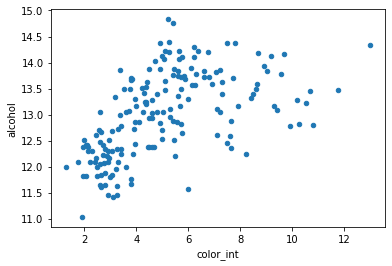

In [75]:
# This looks interesting: stronger wines tend to have more intensive color. Makes sense!
wines.plot.scatter('color_int', 'alcohol');

## 5) Create at least one visualization from a crosstab:

Remember that a crosstab is just a dataframe and can be manipulated in the same way by row index, column, index, or column/row/cell position.


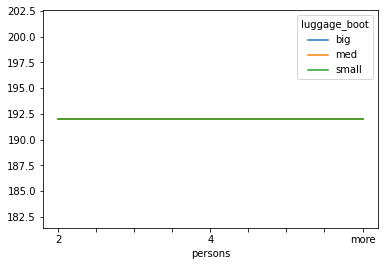

In [85]:
# Perfect horizontal line, as anticipated
pd.crosstab(cars['persons'], cars['luggage_boot']).plot();


## Stretch Goals 

The following additional study tasks are optional, they are intended to give you an opportunity to stretch yourself beyond the main requirements of the assignment. You can pick and choose from the below, you do not need to complete them in any particular order.

### - Practice Exploring other Datasets

### -  Try using the Seaborn plotting library's "Pairplot" functionality in order to explore all of the possible histograms and scatterplots of your dataset all at once:

[Seaborn Pairplot](https://seaborn.pydata.org/generated/seaborn.pairplot.html)

### - Turn some of the continuous variables into categorical variables by binning the values using:
- [pd.cut()](https://pandas.pydata.org/pandas-docs/version/0.23.4/generated/pandas.cut.html)
- [pd.qcut()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.qcut.html)
- <https://stackoverflow.com/questions/30211923/what-is-the-difference-between-pandas-qcut-and-pandas-cut>

And then use crosstabs to compare/visualize these binned variables against the other variables.


### - Other types and sources of data
Not all data comes in a nice single file - for example, image classification involves handling lots of image files. You still will probably want labels for them, so you may have tabular data in addition to the image blobs - and the images may be reduced in resolution and even fit in a regular csv as a bunch of numbers.

If you're interested in natural language processing and analyzing text, that is another example where, while it can be put in a csv, you may end up loading much larger raw data and generating features that can then be thought of in a more standard tabular fashion.

Overall you will in the course of learning data science deal with loading data in a variety of ways. Another common way to get data is from a database - most modern applications are backed by one or more databases, which you can query to get data to analyze. We'll cover this more in our data engineering unit.

How does data get in the database? Most applications generate logs - text files with lots and lots of records of each use of the application. Databases are often populated based on these files, but in some situations you may directly analyze log files. The usual way to do this is with command line (Unix) tools - command lines are intimidating, so don't expect to learn them all at once, but depending on your interests it can be useful to practice.

One last major source of data is APIs: https://github.com/toddmotto/public-apis

API stands for Application Programming Interface, and while originally meant e.g. the way an application interfaced with the GUI or other aspects of an operating system, now it largely refers to online services that let you query and retrieve data. You can essentially think of most of them as "somebody else's database" - you have (usually limited) access.

*Stretch goal* - research one of the above extended forms of data/data loading. See if you can get a basic example working in a notebook. Image, text, or (public) APIs are probably more tractable - databases are interesting, but there aren't many publicly accessible and they require a great deal of setup.